<a href="https://colab.research.google.com/github/sokrypton/laxy/blob/main/laxy_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget -qnc https://raw.githubusercontent.com/sokrypton/laxy/main/laxy.py

In [3]:
import matplotlib.pyplot as plt
import jax.numpy as jnp
import numpy as np
from laxy import *

# LINEAR REGRESSION

In [4]:
x = jnp.arange(10)
y = x*2.0 + 3.0

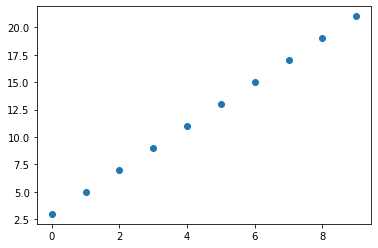

In [5]:
plt.scatter(x,y)

In [6]:
def model(params, inputs):
  out = inputs["x"] * params["m"] + params["b"]
  loss = jnp.square(inputs["y"] - out)
  return out, loss

In [7]:
inputs = {"x":x, "y":y}
params = {"m":1.0,"b":0.0}

In [8]:
opt = OPT(model, params)

In [9]:
# take one step
opt.train_on_batch(inputs)

DeviceArray(645., dtype=float32)

In [10]:
# take multiple steps
losses = opt.fit(inputs, steps=10000)

1000 97.35117
2000 11.0169935
3000 6.2362566
4000 4.275576
5000 2.3379107
6000 0.9020636
7000 0.20016143
8000 0.017611317
9000 0.00031888438
10000 4.0625906e-07


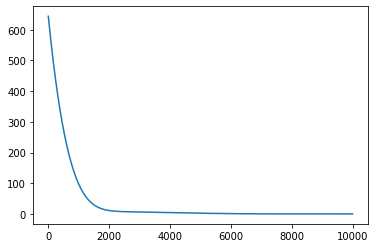

In [11]:
plt.plot(losses)

In [12]:
opt.get_params()

{'b': DeviceArray(2.9996283, dtype=float32),
 'm': DeviceArray(2.000062, dtype=float32)}

In [13]:
opt.evaluate(inputs)

DeviceArray([1.3815685e-07, 9.6065378e-08, 6.1481842e-08, 3.4583536e-08,
             1.5370460e-08, 3.8426151e-09, 0.0000000e+00, 3.9617589e-09,
             1.5370460e-08, 3.4939148e-08], dtype=float32)

In [14]:
opt.predict(inputs)

DeviceArray([ 2.9996283,  4.99969  ,  6.999752 ,  8.999814 , 10.999876 ,
             12.999938 , 15.       , 17.000063 , 19.000124 , 21.000187 ],            dtype=float32)

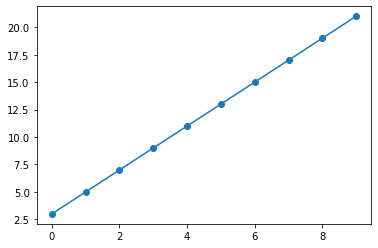

In [15]:
plt.scatter(x,y)
plt.plot(x,opt.predict(inputs))

#STAX

In [16]:
from jax.experimental import stax

In [17]:
# define NN using stax
stax_layers = stax.serial(stax.Dense(5),
                          stax.Elu,
                          stax.Dense(1))
nn_params, nn_layers = STAX(stax_layers, input_shape=(None,10))

In [18]:
params = {"nn":nn_params,
          "a":1.0}

In [19]:
def model(params, inputs):
  out = nn_layers(params["nn"], inputs["x"]) * params["a"]
  loss = jnp.square(out - inputs["y"]).sum()
  return out,loss

In [20]:
opt = OPT(model, params)

In [21]:
inputs = {"x":np.random.normal(size=(100,10)),
          "y":np.random.normal(size=(100,1))}

In [22]:
losses = opt.fit(inputs, steps=1000)

100 111.05655
200 85.67459
300 77.50914
400 73.60492
500 70.78748
600 68.525185
700 66.70577
800 65.20142
900 63.78608
1000 62.316845


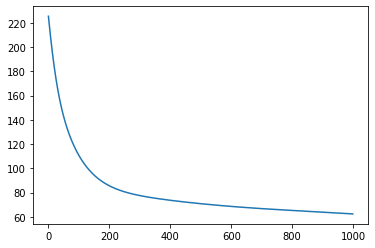

In [23]:
plt.plot(losses)

# build a NN using custom layers from laxy
custom layers include: MRF, Conv1D, Conv2D, GRU, LSTM, Dense

In [24]:
params = {"D0": Dense()(in_dims=10, out_dims=5),
          "D1": Dense()(in_dims=5, out_dims=1),
          "a":1.0}

In [25]:
def model(params, inputs):
  I = inputs["x"]
  D = Dense(params["D0"])(I)
  D = jax.nn.elu(D)
  O = Dense(params["D1"])(D) * params["a"]
  loss = jnp.square(O - inputs["y"]).sum()
  return O,loss

In [26]:
opt = OPT(model, params)

In [27]:
inputs = {"x":np.random.normal(size=(100,10)),
          "y":np.random.normal(size=(100,1))}

In [28]:
%%time
losses = opt.fit(inputs, steps=1000)

100 108.88072
200 95.2547
300 90.23831
400 86.99979
500 84.36276
600 82.08101
700 80.0423
800 78.0709
900 76.025406
1000 73.82086
CPU times: user 1.53 s, sys: 61 ms, total: 1.59 s
Wall time: 1.52 s


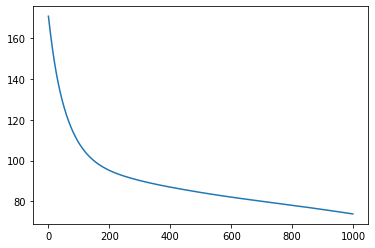

In [29]:
plt.plot(losses)